In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading Data

In [31]:
data = pd.read_csv('data.csv')

data.describe()

,km,price
count,24.000000,24.000000
mean,101066.250000,6331.833333
std,52674.245606,1319.654193
min,22899.000000,3650.000000
25%,65020.500000,5687.500000
50%,83014.500000,6495.000000
75%,140975.000000,7115.000000
max,240000.000000,8290.000000


## Distrubation histogram

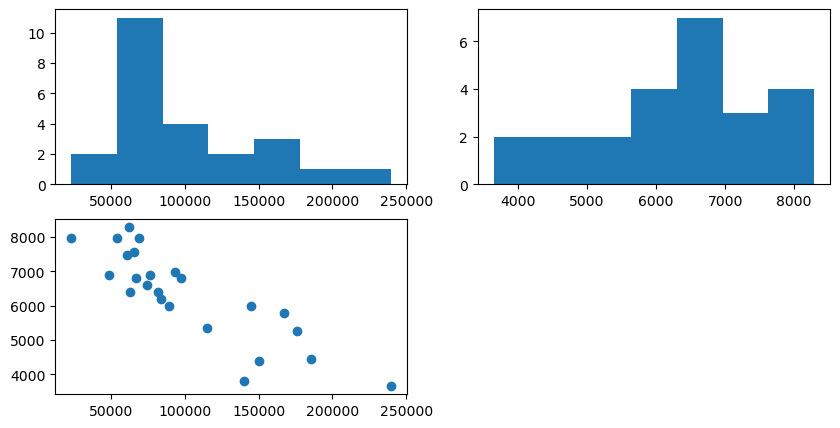

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0, 0].hist(data['km'], bins=7)
axs[0, 1].hist(data['price'], bins=7)
axs[1, 0].scatter(x=data['km'], y=data['price'])

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.show()

In [33]:
# ss_mean = len(data) * var_mean
#sum of square over the mean
ss_mean = np.sum((data['price'] - data['price'].mean()) ** 2)
varmean = ss_mean / len(data)


In [ ]:
# Perform least squares fit manually
x = data['km']
y = data['price']
n = len(x)

# Calculate the slope (m) and intercept (b)
m = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x ** 2) - np.sum(x) ** 2)
b = (np.sum(y) - m * np.sum(x)) / n

# Calculate the fitted line
fit_line = m * x + b

# Calculate R-squared value
ss_total = np.sum((data['price'] - data['price'].mean()) ** 2)
ss_residual = np.sum((data['price'] - fit_line) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Calculate the least squared estimate for the slope
slope = fit[0]

# Print the results
print(f"Fit coefficients: {fit}")
print(f"R-squared: {r_squared}")
print(f"Least squared estimate for the slope: {slope}")

# Check the importance of data['km'] to varmean
importance = r_squared * varmean
print(f"Importance of data['km'] to varmean: {importance}")


#this mean theres 0,73 percents of reduction variation when we take the km to the price into account

Fit coefficients: [-2.14489636e-02  8.49959965e+03]
R-squared: 0.7329747078314965
Least squared estimate for the slope: -0.02144896359170235
Importance of data['km'] to varmean: 1223279.9771509487


In [39]:


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1/(2*m)) * np.sum((predictions - y)**2)

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Include intercept term (column of 1s)
y = np.array([1, 2, 3])
theta = np.zeros(2)
alpha = 0.1
iterations = 1000
theta, costs = gradient_descent(X, y, theta, alpha, iterations)
print(theta)
pr = 2 * theta[0] + theta[1]
print(pr)

[2.06458287e-06 9.99999092e-01]
1.0000032209521874


## Snagat Poc for simple linear regression using Gradient Descent

In [57]:
def linear_regression(x, y):
    a = b = 0
    alpha = 0.01
    for _ in range(1000):
        ypred = a * x + b
        der_a = np.sum((ypred - y) * x)
        der_b = np.sum(ypred - y)
        a -= alpha * der_a / len(y)
        b -= alpha * der_b / len(y)
    return a, b

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
a , b = linear_regression(x, y)

print(2 * a + b)

6.813388860197202


In [95]:
def linear_regression_vectorize(theta,X, y):
    alpha = 0.1
    m = len(y)
    for _ in range(1000):
        ypred = X.dot(theta)
        print(ypred.shape)
        grad = 1/m * X.T.dot(ypred - y)
        print(grad.shape)
        theta = theta - alpha * grad
    return theta

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
# a , b = linear_regression_vectorize(x,y)
X = np.vstack((np.ones(len(x)), x)).T


theta = np.zeros(2)
theta.reshape(1,2)

thetas = linear_regression_vectorize(theta, X, y)

result = 4 * thetas[1] + thetas[0]
print(result)


(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)


## Now we working on real project aka ft_linear_regression

In [98]:
%matplotlib inline

Fitted coefficients: (2.3666254141592853e-16, -0.8561024601837492)


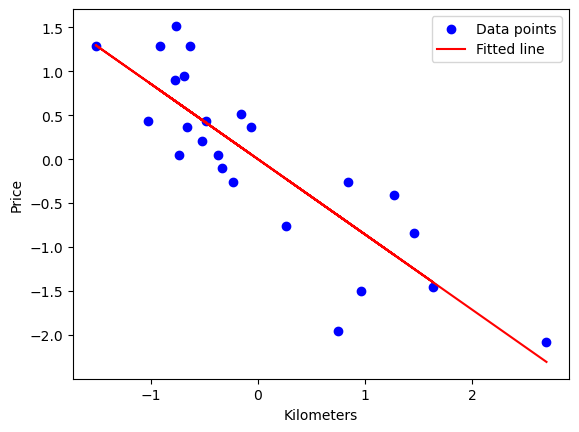

NameError: name 'data' is not defined

In [6]:
class LinearRegression1337:
	def __init__(self):
		self.theta = np.zeros(2)
		self.iterations = 1000
		self.data = pd.read_csv('data.csv')
		self.alpha = 0.01  # learning rate
		self.m = len(self.data)
		self.x1 = np.array(self.data['km'])
		self.y1 = np.array(self.data['price'])

		self.x = (self.x1 - np.mean(self.x1)) / np.std(self.x1)
		self.y = (self.y1 - np.mean(self.y1)) / np.std(self.y1)
		self.X = np.vstack((np.ones(self.m), self.x)).T

	def gradient_descent(self):
		for _ in range(self.iterations):
			y_pred = self.X.dot(self.theta)
			grad = 1/self.m * self.X.T.dot(y_pred - self.y)
			self.theta -= self.alpha * grad
		return self.theta

	def fit(self):
		self.theta = self.gradient_descent()
		return self.theta

	def predict(self, x):
		x_standardized = (x - np.mean(self.x1)) / np.std(self.x1)
		X_pred = np.vstack((np.ones(len(x_standardized)), x_standardized)).T
		return X_pred.dot(self.theta)

	def plot_fit(self):
		plt.scatter(self.x, self.y, color='blue', label='Data points')
		plt.plot(self.x, self.predict(self.x1), color='red', label='Fitted line')
		plt.xlabel('Kilometers')
		plt.ylabel('Price')
		plt.legend()
		plt.show()

# Example usage:
model = LinearRegression1337()
theta = model.fit()
print(f"Fitted coefficients: {theta[0], theta[1]}")
model.plot_fit()

# Predicting after standardization
predictions = model.predict(np.array(data['km']))
print(predictions)


Fitted coefficients: (np.float64(6331.559980189939), np.float64(-1105.9721327347058))


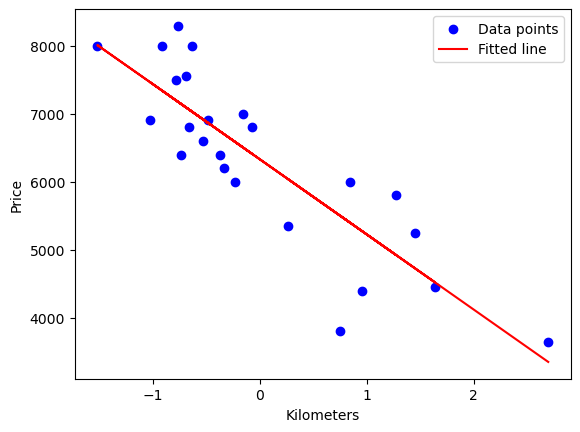

[3351.70368445 5500.79705329 5271.30305083 4519.97829324 4724.37809169
 6036.99799362 4921.70003773 6590.35736404 5399.99127651 6697.59755211
 6739.87163424 7146.71945973 6912.07792824 6408.04904433 7062.21419153
 6868.64565207 7464.68661734 6504.56521359 7191.99626713 7090.65428941
 7341.0386805  7030.04213511 8008.09409831 7173.97991553]
Mean Squared Error: 445645.3220731106
R-squared: 0.7329746616929181
Model Accuracy: 73.29746616929181%


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression1337:
    def __init__(self):
        self.theta = np.zeros(2)
        self.iterations = 1000
        self.data = pd.read_csv('data.csv')
        self.alpha = 0.01  # learning rate
        self.m = len(self.data)
        self.x1 = np.array(self.data['km'])
        self.y = np.array(self.data['price'])

        self.x = (self.x1 - np.mean(self.x1)) / np.std(self.x1)
        self.X = np.vstack((np.ones(self.m), self.x)).T

    def gradient_descent(self):
        for _ in range(self.iterations):
            y_pred = self.X.dot(self.theta)
            grad = 1/self.m * self.X.T.dot(y_pred - self.y)
            self.theta -= self.alpha * grad
        return self.theta

    def fit(self):
        self.theta = self.gradient_descent()
        return self.theta

    def predict(self, x):
        x_standardized = (x - np.mean(self.x1)) / np.std(self.x1)
        X_pred = np.vstack((np.ones(len(x_standardized)), x_standardized)).T
        return X_pred.dot(self.theta)

    def plot_fit(self):
        plt.scatter(self.x, self.y, color='blue', label='Data points')
        plt.plot(self.x, self.predict(self.x1), color='red', label='Fitted line')
        plt.xlabel('Kilometers')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    def mse(self):
        y_pred = self.predict(self.x1)
        mse_value = np.mean((self.y - y_pred) ** 2)
        return mse_value
    def r_squared(self):
        y_pred = self.predict(self.x1)
        ss_total = np.sum((self.y - np.mean(self.y)) ** 2)
        ss_residual = np.sum((self.y - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def model_accuracy(self):
        r2 = self.r_squared()
        return r2 * 100

# Example usage:
model = LinearRegression1337()
theta = model.fit()
print(f"Fitted coefficients: {theta[0], theta[1]}")
model.plot_fit()

# Predicting after standardization
predictions = model.predict(np.array(model.data['km']))
print(predictions)

# Calculate and print MSE
mse_value = model.mse()
print(f"Mean Squared Error: {mse_value}")
r2_value = model.r_squared()
accuracy = model.model_accuracy()
print(f"R-squared: {r2_value}")
print(f"Model Accuracy: {accuracy}%")

Fitted coefficients (custom): (2.3666254141592853e-16, -0.8561024601837492)


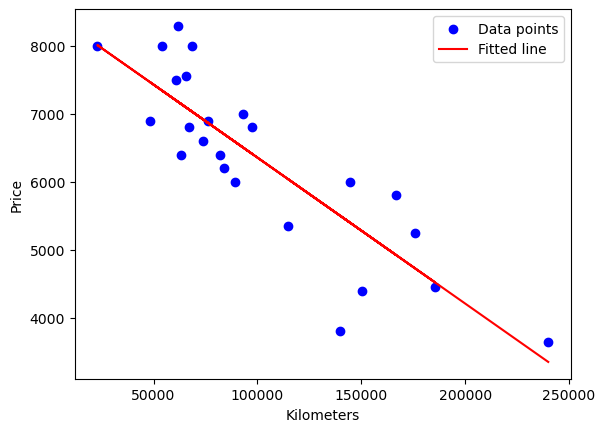

[3351.97703759 5501.07040643 5271.57640397 4520.25164638 4724.65144484
 6037.27134676 4921.97339088 6590.63071718 5400.26462965 6697.87090525
 6740.14498739 7146.99281287 6912.35128138 6408.32239747 7062.48754467
 6868.91900521 7464.95997049 6504.83856673 7192.26962027 7090.92764255
 7341.31203365 7030.31548825 8008.36745145 7174.25326868]
Mean Squared Error (custom): 445645.2473511696
R-squared (custom): 0.7329747064654101
Model Accuracy (custom): 73.297470646541%
Fitted coefficients (scikit-learn): 8499.599649933214, -0.021448963591702296
Mean Squared Error (scikit-learn): 445645.24507127353
R-squared (scikit-learn): 0.7329747078314965


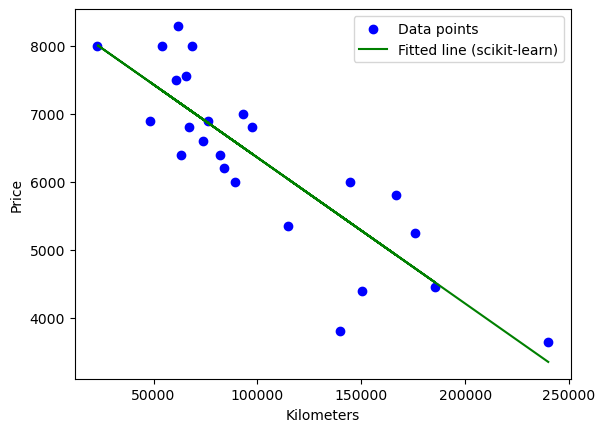

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegression1337:
    def __init__(self):
        self.theta = np.zeros(2)
        self.iterations = 1000
        self.data = pd.read_csv('data_v2.csv')
        self.alpha = 0.01  # learning rate
        self.m = len(self.data)
        self.x1 = np.array(self.data['km'])
        self.y1 = np.array(self.data['price'])

        self.mean_x1 = np.mean(self.x1)
        self.std_x1 = np.std(self.x1)
        self.mean_y1 = np.mean(self.y1)
        self.std_y1 = np.std(self.y1)

        self.x = (self.x1 - self.mean_x1) / self.std_x1
        self.y = (self.y1 - self.mean_y1) / self.std_y1
        self.X = np.vstack((np.ones(self.m), self.x)).T

    def gradient_descent(self):
        for _ in range(self.iterations):
            y_pred = self.X.dot(self.theta)
            grad = 1/self.m * self.X.T.dot(y_pred - self.y)
            self.theta -= self.alpha * grad
        return self.theta

    def fit(self):
        self.theta = self.gradient_descent()
        return self.theta

    def predict(self, x):
        x_standardized = (x - self.mean_x1) / self.std_x1
        X_pred = np.vstack((np.ones(len(x_standardized)), x_standardized)).T
        y_pred_standardized = X_pred.dot(self.theta)
        return y_pred_standardized * self.std_y1 + self.mean_y1

    def plot_fit(self):
        plt.scatter(self.x1, self.y1, color='blue', label='Data points')
        plt.plot(self.x1, self.predict(self.x1), color='red', label='Fitted line')
        plt.xlabel('Kilometers')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    def mse(self):
        y_pred = self.predict(self.x1)
        mse_value = np.mean((self.y1 - y_pred) ** 2)
        return mse_value

    def r_squared(self):
        y_pred = self.predict(self.x1)
        ss_total = np.sum((self.y1 - np.mean(self.y1)) ** 2)
        ss_residual = np.sum((self.y1 - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def model_accuracy(self):
        r2 = self.r_squared()
        return r2 * 100

# Example usage:
model = LinearRegression1337()
theta = model.fit()
print(f"Fitted coefficients (custom): {theta[0], theta[1]}")
model.plot_fit()

# Predicting after standardization
predictions = model.predict(np.array(model.data['km']))
print(predictions)

# Calculate and print MSE
mse_value = model.mse()
print(f"Mean Squared Error (custom): {mse_value}")

# Calculate and print R-squared and model accuracy
r2_value = model.r_squared()
accuracy = model.model_accuracy()
print(f"R-squared (custom): {r2_value}")
print(f"Model Accuracy (custom): {accuracy}%")

# Scikit-learn implementation
X = model.data['km'].values.reshape(-1, 1)
y = model.data['price'].values
reg = LinearRegression().fit(X, y)
y_pred_sklearn = reg.predict(X)

# Coefficients
print(f"Fitted coefficients (scikit-learn): {reg.intercept_}, {reg.coef_[0]}")

# MSE and R-squared
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)
print(f"Mean Squared Error (scikit-learn): {mse_sklearn}")
print(f"R-squared (scikit-learn): {r2_sklearn}")

# Plotting the fit
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred_sklearn, color='green', label='Fitted line (scikit-learn)')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.legend()
plt.show()